In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

In [58]:
uri = "dadosParaMineracaoRegrasAssociacao2019.csv"
dados = pd.read_csv(uri,sep=";",encoding='latin1')
dados['TP_LINGUA'].replace(0, "Inglês", inplace=True)
dados['TP_LINGUA'].replace(1, "Espanhol", inplace=True)
dados.rename(columns={"Q024" : "Tem Computador"}, inplace=True)
dados.rename(columns={"Q022" : "Tem Celular"}, inplace=True)
dados.rename(columns={"Q025" : "Tem Internet"}, inplace=True)
dados.rename(columns={"Q001" : "Estudo Pai"}, inplace=True)
dados.rename(columns={"Q002" : "Estudo Mãe"}, inplace=True)
dados.rename(columns={"Q003" : "Trabalho Pai"}, inplace=True)
dados.rename(columns={"Q004" : "Trabalho Mãe"}, inplace=True)
dados

,TP_SEXO,TP_COR_RACA,CO_ESCOLA,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,...,Tem Internet,RendaMaxima,ClasseSocial,anosEstudoPai,anosEstudoMae,COR_RACA,RazaoPessoasQuarto,PessoasPorQuarto,NU_MEDIA,MEDIA_FAIXA
0,F,Branco,15230023.0,Paragominas,PA,Particular,Urbano,574.2,538.7,582.6,...,Sim,1497,E,0,12,Branco,0.75,"(0, 1]",581.40,"(576.04, 713.43]"
1,F,Parda,15042626.0,Belém,PA,Estadual,Urbano,369.7,398.2,395.6,...,Nao,998,E,4,4,NaoBranco,4.00,"(3, 4]",423.46,"(0.0, 438.65]"
2,F,Parda,15045560.0,Castanhal,PA,Estadual,Urbano,376.4,354.7,525.8,...,Nao,1497,E,4,9,NaoBranco,1.50,"(1, 2]",461.26,"(438.65, 576.04]"
3,F,Parda,15038378.0,Belém,PA,Estadual,Urbano,423.0,372.8,488.7,...,Nao,1497,E,12,12,NaoBranco,3.00,"(2, 3]",468.20,"(438.65, 576.04]"
4,F,Parda,15582949.0,Paragominas,PA,Estadual,Urbano,412.5,417.2,485.1,...,Sim,1497,E,12,12,NaoBranco,1.50,"(1, 2]",468.20,"(438.65, 576.04]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920583,F,Branco,31103527.0,João Monlevade,MG,Estadual,Urbano,533.3,485.8,530.2,...,Sim,998,E,9,12,Branco,2.50,"(2, 3]",536.96,"(438.65, 576.04]"
920584,F,Branco,31174688.0,Três Pontas,MG,Estadual,Urbano,486.2,543.4,560.3,...,Sim,7984,C,16,16,Branco,1.50,"(1, 2]",573.02,"(438.65, 576.04]"
920585,F,Preta,31253227.0,Ouro Preto,MG,Federal,Urbano,500.8,563.2,555.3,...,Sim,4990,C,16,18,NaoBranco,1.67,"(1, 2]",568.42,"(438.65, 576.04]"
920586,F,Parda,31009107.0,Uberlândia,MG,Federal,Urbano,491.6,549.3,586.8,...,Sim,7984,C,12,18,NaoBranco,1.33,"(1, 2]",580.24,"(576.04, 713.43]"


In [59]:
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing
from sklearn.cluster import KMeans
import time
def clustering(data_clustering,num_clusters=2):
    oldTime = time.time()
    clusterer = KMeans(num_clusters,random_state=13)
    cluster_labels = clusterer.fit_predict(data_clustering)
    elapsed = time.time() - oldTime;
    print("Time: ", elapsed)
    return cluster_labels, clusterer

def preprocess(data,preprocess_method=1):
    if preprocess_method == 0:
        scaler = StandardScaler()
        X = scaler.fit_transform(data.values)
    elif preprocess_method == 1:
        scaler = preprocessing.QuantileTransformer(n_quantiles=5, random_state=13)
        X = scaler.fit_transform(data.values)
    elif preprocess_method == 2:
        scaler = preprocessing.MinMaxScaler()
        X = scaler.fit_transform(data.values)
    return X

def silhouette(data_silhouette,cluster_labels):
    oldTime = time.time()
    silhouette_avg = silhouette_score(data_silhouette, cluster_labels)
    print(silhouette_avg)
    elapsed = time.time() - oldTime
    print("Time: ", elapsed)
    return silhouette_avg

def get_notas(dataframe_enem):
    col = dataframe_enem[['NU_NOTA_LC','NU_NOTA_REDACAO','NU_NOTA_MT','NU_NOTA_CH','NU_NOTA_CN']]
    return col



In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
    
def print_clusters_3d(X, clusterer, cluster_labels, n_clusters):
    
    fig = plt.figure(figsize=(20,10))
    ax2 = fig.add_subplot(111, projection='3d')
    

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    #colors = [(0.8862745098039215, 0.2901960784313726, 0.2), (0.20392156862745098, 0.5411764705882353, 0.7411764705882353)]
    ax2.scatter(X[:, 0], X[:,1], X[:, 2], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], centers[:, 4], marker='x', c="red", alpha=1, s=8000)

    #for i, c in enumerate(centers):
    #    ax2.scatter(c[0], c[1], c[4], marker='X', alpha=1,
    #                    s=10000, edgecolor='k')

    ax2.set_title("Visualização 3D dos dados agrupados.")
    ax2.set_xlabel("Nota Linguagens")
    ax2.set_ylabel("Nota Redação")
    ax2.set_zlabel("Nota Matemática")

    plt.suptitle(("Visualização 3D dos dados agrupados, para 3 notas "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')
#     plt.set

    plt.show()

### para todos os testes da amostra os resultados de Silhueta foram o mesmo. 0.42

In [73]:

sample = dados.sample(10000)
notas = get_notas(sample)
notas_processadas = preprocess(notas)
clusters, clusterer = clustering(notas_processadas,9)
silhouette(notas_processadas,clusters)

Time:  0.8713908195495605
0.2513400553250154
Time:  1.7061173915863037


0.2513400553250154

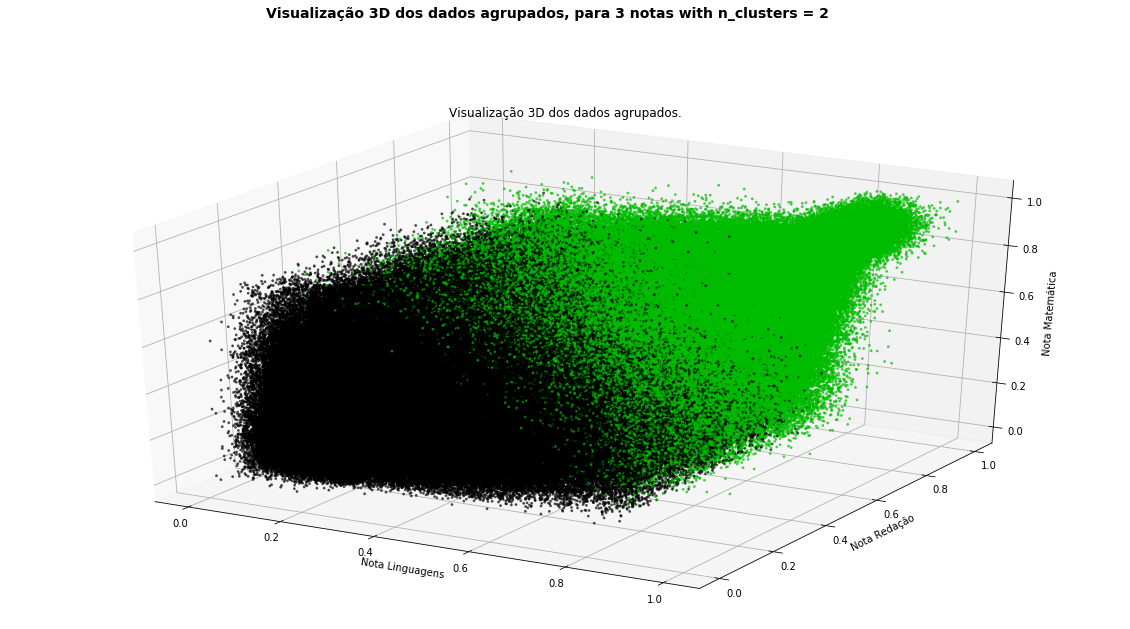

In [61]:
print_clusters_3d(notas_processadas,clusterer,clusters, 2)

In [62]:
dados['Cluster'] = clusters

In [64]:
dados.to_csv("dadosAgrupados.csv",sep=";",encoding='latin1', index=False)

In [17]:
def print_silhouettes(silhouette_scores):
# silhouette_scores = silhouette_scores[:6]
    ax = plt.subplots(figsize=(7, 5))
    plt.plot(range(2,8),silhouette_scores,"bo-",color="blue",linewidth=3,label="Curva Silhueta")
    t = plt.xlabel("Número de clusters")
    text = plt.ylabel("Valor da Silhueta")
    p = plt.xticks([2,3,4,5,6,7,8])

    k = np.argmax(silhouette_scores) + 2

    plt.axvline(x=k,linestyle="--",label="Numero escolhido de clusters({})".format(k))

    plt.scatter(k,silhouette_scores[k-2],c="red",s=400)

    plt.legend(shadow=True)
    text.set_fontsize(20)
    t.set_fontsize(20)

    plt.show()

In [74]:
dados['Cluster'].value_counts()

0    497288
1    423300
Name: Cluster, dtype: int64